In [1]:
import warnings
import pylj
from pylj import comp, mc, sample, util
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
pylj.__cite__()

In [3]:
def mc_simulation(number_of_particles, temperature, box_length, number_of_steps, sample_frequency):
    # Creates the visualisation environment
    %matplotlib notebook
    # Initialise the system
    system = mc.initialise(number_of_particles, temperature, box_length, 'square')
    # This sets the sampling class
    sample_system = sample.Energy(system)
    system.particles, system.distances, system.energies = comp.compute_energy(system.particles, 
                                                                              system.box_length,
                                                                              system.cut_off)
    old_energy = system.energies.sum()
    system = mc.sample(system.particles, system.box_length, old_energy, system)
    # Start at time 0
    # Begin the monte carlo loop
    for i in range(0, number_of_steps):
        system.step += 1
        # At each step, calculate the forces on each particle 
        # and get acceleration
        random_particle, system.position_store = mc.select_random_particle(system.particles)
        system.particles = mc.get_new_particle(system.particles, random_particle, system.box_length)
        system.particles, system.distances, system.energies = comp.compute_energy(system.particles, 
                                                                                  system.box_length, 
                                                                                  system.cut_off)
        new_energy = system.energies.sum()
        if mc.metropolis(temperature, old_energy, new_energy):
            old_energy = mc.accept(new_energy)
        else:
            system.particles = mc.reject(system.position_store, system.particles, random_particle)
        system = mc.sample(system.particles, system.box_length, old_energy, system)
        # At a given frequency sample the positions and plot the RDF
        if system.step % sample_frequency == 0:
            sample_system.update(system)
    return system

The `mc_simulation` function takes five variables:
- The number of particles
- The simulation temperature (for the Metropolis condition)
- The simulation cell vector
- The number of steps
- The sampling frequency (how often the image is updated)

<IPython.core.display.Javascript object>


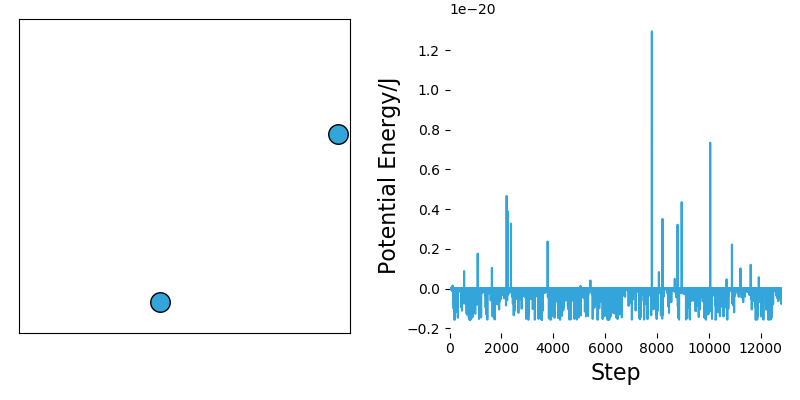

KeyboardInterrupt: 

In [4]:
system = mc_simulation(2, 273.15, 45, 100000, 100)